In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [80]:
# Load output
ssh_SVB = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
ssh_noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')


In [81]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

0.0 km away from SVB: max correlation is 1.00 for lag=0.00 hr
106.4 km away from SVB: max correlation is 0.73 for lag=0.17 hr
206.7 km away from SVB: max correlation is 0.60 for lag=0.33 hr
313.7 km away from SVB: max correlation is 0.52 for lag=0.83 hr
425.8 km away from SVB: max correlation is 0.64 for lag=1.17 hr
528.6 km away from SVB: max correlation is 0.71 for lag=1.33 hr
641.7 km away from SVB: max correlation is 0.74 for lag=1.50 hr
930.7 km away from SVB: max correlation is 0.78 for lag=1.50 hr
1231.4 km away from SVB: max correlation is 0.74 for lag=1.67 hr
1491.3 km away from SVB: max correlation is 0.76 for lag=1.67 hr


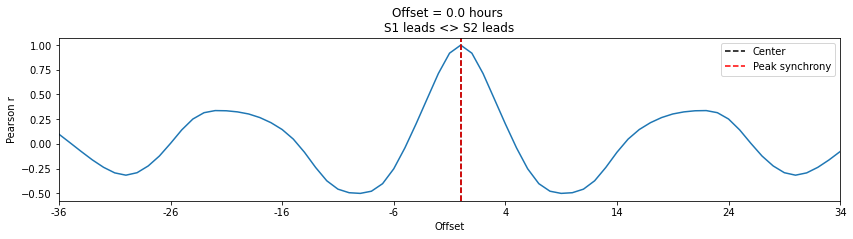

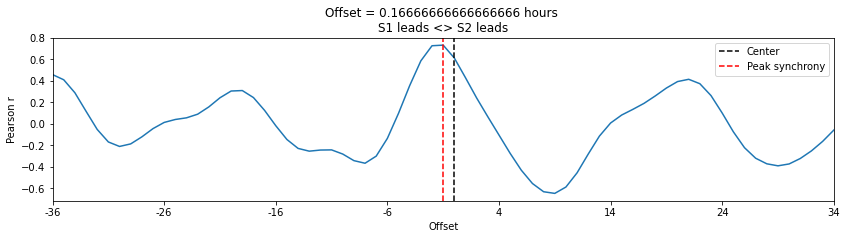

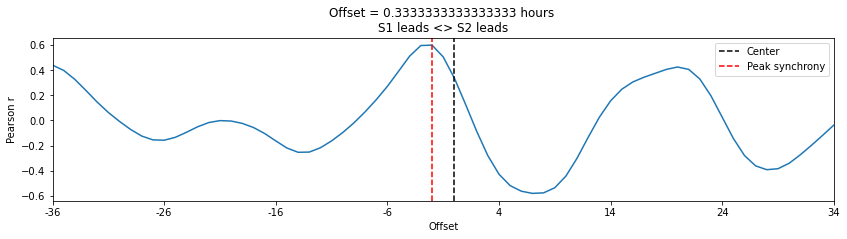

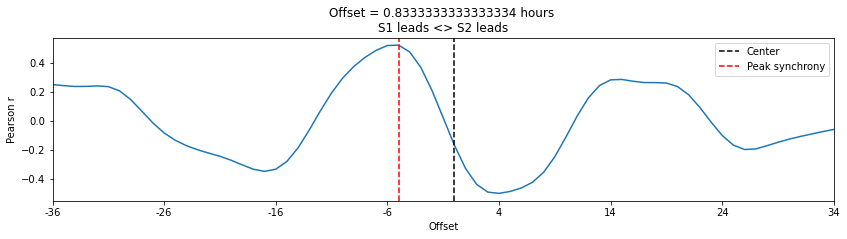

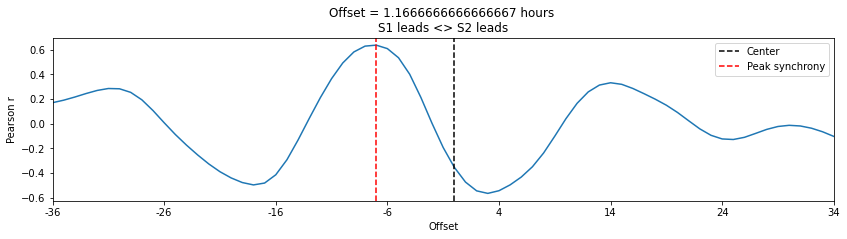

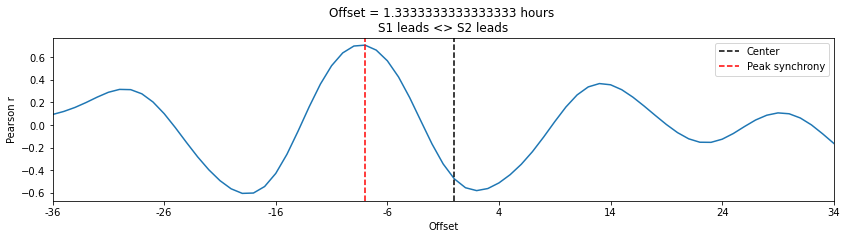

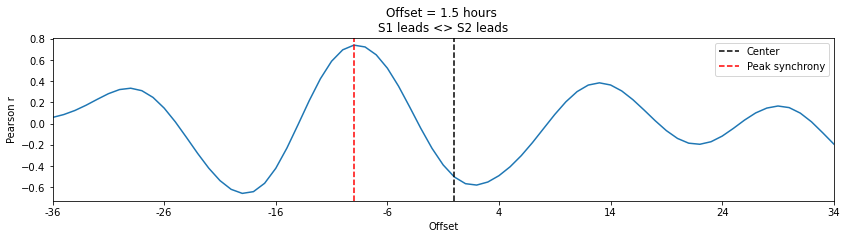

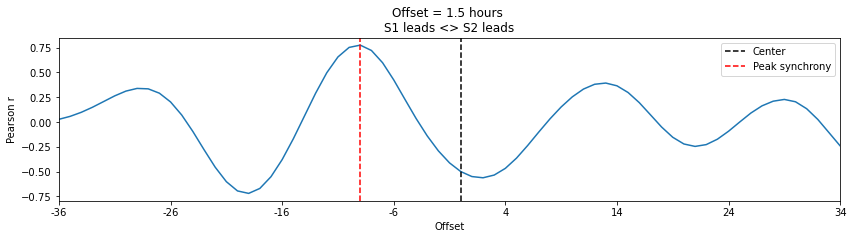

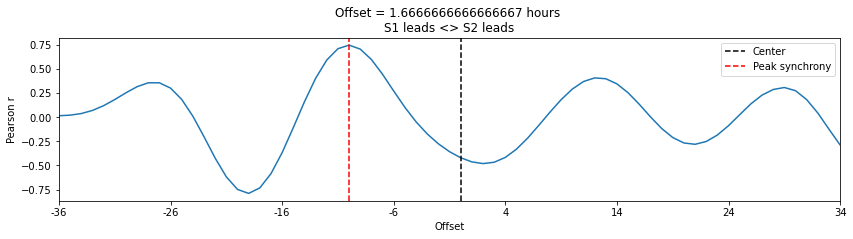

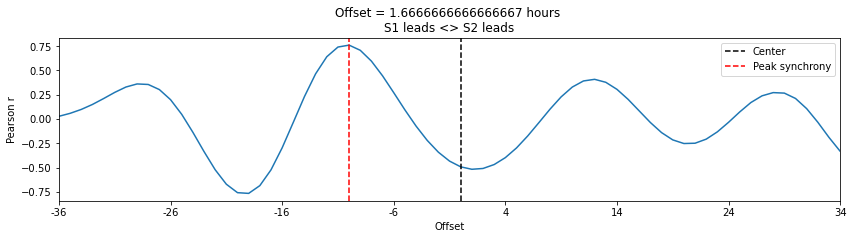

In [99]:
kk1 = 0
nt = 144
dx = 10
for kk2 in range(0,500,50):
    ssh1 = (ssh_SVB.curtain_data[:nt,kk1]-ssh_noSVB.curtain_data[:nt,kk1]).data
    df1 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh1})
    ssh2 = (ssh_SVB.curtain_data[:nt,kk2]-ssh_noSVB.curtain_data[:nt,kk2]).data
    df2 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh2})

    d1 = df1.ssh
    d2 = df2.ssh
    periods = nt/4

    rs = [crosscorr(d1,d2, lag) for lag in range(-int(periods),int(periods))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)

    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset*600/3600} hours \nS1 leads <> S2 leads',xlim=[0,periods], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([x for x in range(0,int(periods*2),dx)])
    ax.set_xticklabels([x for x in range(-int(periods),int(periods),dx)]);

    plt.legend()
    print('%1.1f km away from SVB: max correlation is %1.2f for lag=%1.2f hr' %(ssh_SVB.X[kk2], 
                                                                                np.nanmax(rs), 
                                                                                (offset*600)/3600))

Text(0, 0.5, 'Lag (hr)')

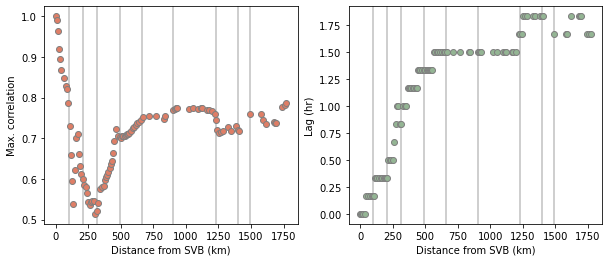

In [126]:
kk1 = 0
nt = 144 # one-day long time series
dx = 10

fig,(ax,ax2)=plt.subplots(1,2,figsize=(10,4))

for kk, lab in zip([47,100,150,230,307,335,400,440,450], 
                   ['San Quintín','CEns' ,'Ensenada','San Diego','LA1','LA2','SBC1','SBC','SBC2']):
    ax.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    ax2.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    
for kk2 in range(0,500,5):
    ssh1 = (ssh_SVB.curtain_data[:nt,kk1]-ssh_noSVB.curtain_data[:nt,kk1]).data
    df1 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh1})
    ssh2 = (ssh_SVB.curtain_data[:nt,kk2]-ssh_noSVB.curtain_data[:nt,kk2]).data
    df2 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh2})

    d1 = df1.ssh
    d2 = df2.ssh
    periods = nt/4

    rs = [crosscorr(d1,d2, lag) for lag in range(-int(periods),int(periods))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)

    ax.plot(ssh_SVB.X[kk2],np.nanmax(rs),'o', markeredgecolor='0.5', color="#df7e66")
    ax2.plot(ssh_SVB.X[kk2],(offset*600)/3600, 'o', markeredgecolor='0.5', color="#94b594")

ax.set_xlabel('Distance from SVB (km)')
ax.set_ylabel('Max. correlation')
ax2.set_xlabel('Distance from SVB (km)')
ax2.set_ylabel('Lag (hr)')

Text(0, 0.5, 'Lag (hr)')

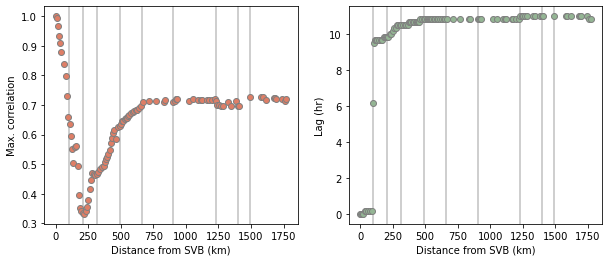

In [128]:
kk1 = 0
nt = 288 # two days long time series
dx = 10

fig,(ax,ax2)=plt.subplots(1,2,figsize=(10,4))

for kk, lab in zip([47,100,150,230,307,335,400,440,450], 
                   ['San Quintín','CEns' ,'Ensenada','San Diego','LA1','LA2','SBC1','SBC','SBC2']):
    ax.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    ax2.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    
for kk2 in range(0,500,5):
    ssh1 = (ssh_SVB.curtain_data[:nt,kk1]-ssh_noSVB.curtain_data[:nt,kk1]).data
    df1 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh1})
    ssh2 = (ssh_SVB.curtain_data[:nt,kk2]-ssh_noSVB.curtain_data[:nt,kk2]).data
    df2 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh2})

    d1 = df1.ssh
    d2 = df2.ssh
    periods = nt/4

    rs = [crosscorr(d1,d2, lag) for lag in range(-int(periods),int(periods))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)

    ax.plot(ssh_SVB.X[kk2],np.nanmax(rs),'o', markeredgecolor='0.5', color="#df7e66")
    ax2.plot(ssh_SVB.X[kk2],(offset*600)/3600, 'o', markeredgecolor='0.5', color="#94b594")

ax.set_xlabel('Distance from SVB (km)')
ax.set_ylabel('Max. correlation')
ax2.set_xlabel('Distance from SVB (km)')
ax2.set_ylabel('Lag (hr)')

This 10 hour lag is correlated to the small, thrid peak in freq?

Text(0, 0.5, 'Lag (hr)')

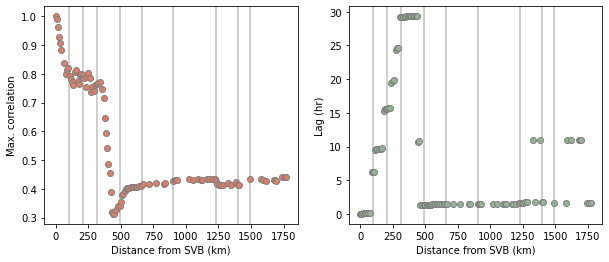

In [129]:
kk1 = 0
nt = 720 # 5 days
dx = 10

fig,(ax,ax2)=plt.subplots(1,2,figsize=(10,4))

for kk, lab in zip([47,100,150,230,307,335,400,440,450], 
                   ['San Quintín','CEns' ,'Ensenada','San Diego','LA1','LA2','SBC1','SBC','SBC2']):
    ax.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    ax2.axvline(ssh_SVB.X[kk], color='0.5', alpha=0.5)
    
for kk2 in range(0,500,5):
    ssh1 = (ssh_SVB.curtain_data[:nt,kk1]-ssh_noSVB.curtain_data[:nt,kk1]).data
    df1 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh1})
    ssh2 = (ssh_SVB.curtain_data[:nt,kk2]-ssh_noSVB.curtain_data[:nt,kk2]).data
    df2 = pd.DataFrame({'time':ssh_SVB.T[:nt].data, 
                       'ssh':ssh2})

    d1 = df1.ssh
    d2 = df2.ssh
    periods = nt/4

    rs = [crosscorr(d1,d2, lag) for lag in range(-int(periods),int(periods))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)

    ax.plot(ssh_SVB.X[kk2],np.nanmax(rs),'o', markeredgecolor='0.5', color="#df7e66")
    ax2.plot(ssh_SVB.X[kk2],(offset*600)/3600, 'o', markeredgecolor='0.5', color="#94b594")

ax.set_xlabel('Distance from SVB (km)')
ax.set_ylabel('Max. correlation')
ax2.set_xlabel('Distance from SVB (km)')
ax2.set_ylabel('Lag (hr)')